In [1]:
import yfinance as yf
import seaborn as sns

In [2]:
# Define pre and post period dates
start = '2015-12-28'
training_end = '2018-03-05'
treatment_start = '2018-03-12'
end = '2018-07-16'
end_stock = '2018-07-17'

# Get stock data
stocks = ['Meta','WMT','DIS','BMW.DE','NVS','GS','GE','KHC','MCD','CARL-B.CO']

df = yf.download(stocks,
                start=start,
                end=end_stock,
                interval='1wk')

[*********************100%%**********************]  10 of 10 completed


In [3]:
# Getting ont the useful data
df_filtered = df.iloc[:,:10]

df_filtered.columns = df_filtered.columns.droplevel()

df_filtered.head()

,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,META,NVS,WMT
Date,,,,,,,,,,
2015-12-28,64.783699,509.867371,98.814964,167.434570,153.509109,52.110069,97.066406,104.660004,57.095676,52.198662
2016-01-04,55.367729,494.467346,93.332558,152.921783,139.634308,50.978447,94.880913,97.330002,54.122776,54.106083
2016-01-11,51.771210,442.440002,88.301529,153.136780,132.539322,49.560417,94.634415,94.970001,53.240200,52.735134
2016-01-18,52.892639,449.931946,91.122673,151.792984,133.603989,53.277447,97.280029,97.940002,54.574020,53.382298
2016-01-25,50.868771,481.148285,90.107056,156.415604,137.607117,55.905865,101.700348,112.209999,51.740479,56.507393


<Axes: xlabel='Date'>

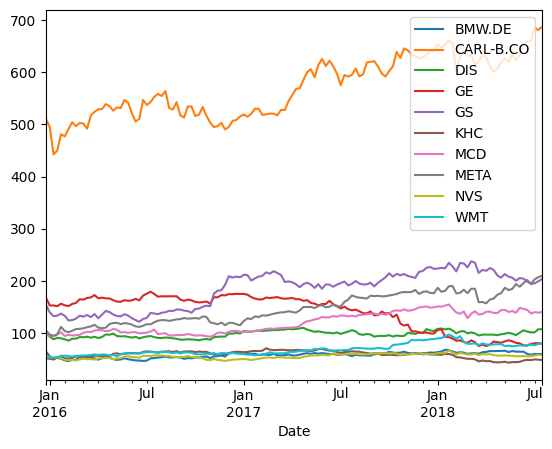

In [4]:
# Plotting data

df_filtered.plot()

<Axes: >

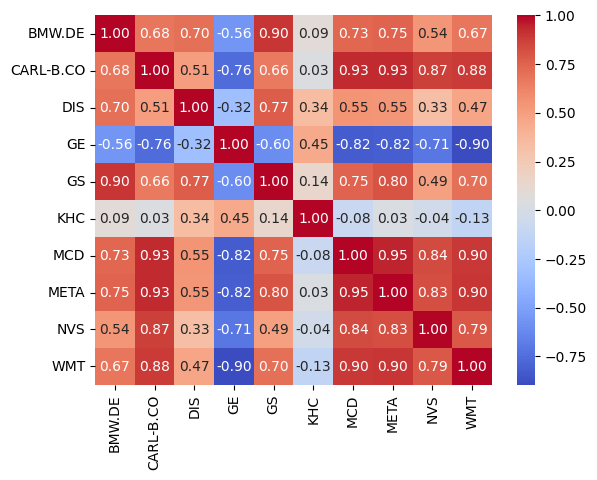

In [6]:
# Create dataset with training period only
df_cor = df_filtered[df_filtered.index <= treatment_start]

# Correlation Matix
sns.heatmap(df_cor.corr(), annot=True, cmap="coolwarm", fmt=".2f")